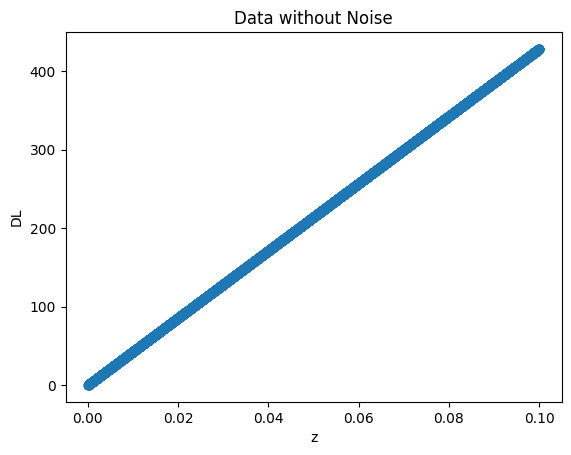

FOR LINEAR FITTING ( LEAST SQUARE METHOD ) : y = ax + b 
Fitted coefficients: a = 4282.7493999999915, b = 3.694822225952521e-13
Value of Chi_min square(L) :  2.777036103878822e-28
Value of H_o(L) :  70.04845999161206  km/s/Mpc


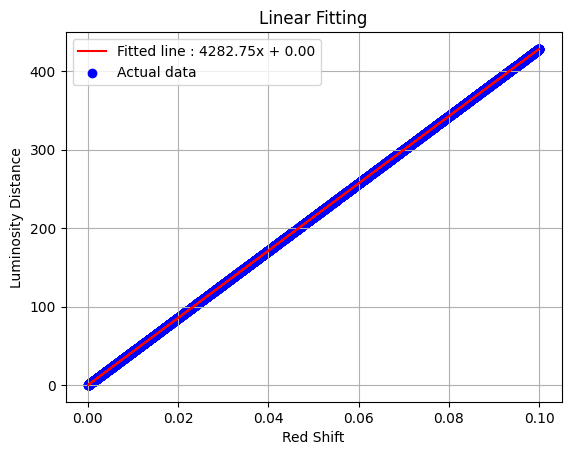


FOR POLYNOMIAL FITTING ( QUADRATIC ) : y = a0 + a1(x) + a2(x^2) 
Fitted coefficients: a0 = 4.656612873077393e-13, a1 = 4282.749399999969, a2 = 3.231789849866297e-10
Value of Chi_min square(Q) :  2.8632919956268275e-28
Value of H_o(Q) :  70.04845999161165  km/s/Mpc


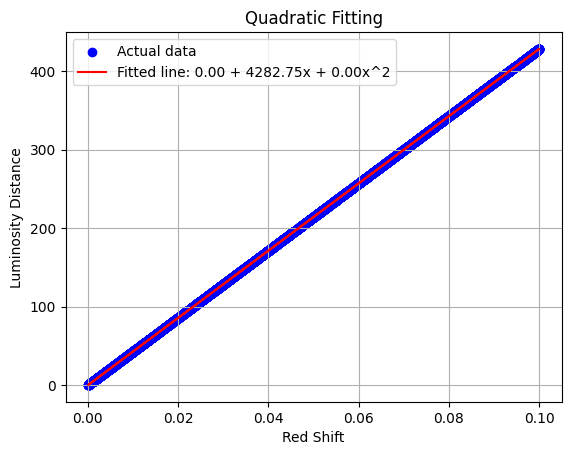

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import astropy.cosmology as cosmo
import astropy.units as unit
import astropy.constants as cons
import h5py

def dl_true_lowz(z, H0):
    return (cons.c.to(unit.km/unit.s).value*z)/H0
N = 10000 #No. of data points
zt = np.random.uniform(0.0001, 0.1, N) #True Redshift points
H0t = 70 #Injected value of True Hubble constant in km/s/Mpc
DLt = dl_true_lowz(zt, H0t) #True distance points in Mpc

plt.scatter(zt, DLt)
plt.xlabel('z')
plt.ylabel('DL')
plt.title('Data without Noise')
plt.show()

#Assignment Portion
def LeastSqFit(x,y):
    print("FOR LINEAR FITTING ( LEAST SQUARE METHOD ) : y = ax + b ")
    n = len(x)
    x_mean = np.sum(x)/(n*1.0)
    y_mean = np.sum(y)/(n*1.0)
    Y = []
    c = 3.0 * (10**5) #km/s
    x_xm2 = 0.0
    xy_xym = 0.0
    for i in range(n):
        x_xm2 = x_xm2 + ((x[i] - x_mean)**2)
        xy_xym = xy_xym + ((x[i] - x_mean)*(y[i] - y_mean))
    a = ((xy_xym))/((x_xm2))
    b = y_mean - (a*x_mean)
    for i in range(n):
        Y.append((a*x[i]) + b)
    print(f"Fitted coefficients: a = {a}, b = {b}")

    E = 0.0
    Ysum = np.sum(Y)
    for i in range(n):
        E = E + ((y[i]-Y[i])**2)
    Chi = E/Ysum # Can try without the division of Ysum
    print("Value of Chi_min square(L) : ",Chi)
    H = (c/a)

    #error bar
    sigma_x = np.sqrt((1.0/(n-1))*np.sum((x-x_mean)**2))
    sigma_y = np.sqrt((1.0/(n-1))*np.sum((y-y_mean)**2))
    sigma_H = H*np.sqrt(((sigma_x/x)**2)+((sigma_y/y)**2))

    print("Value of H_o(L) : ",H," km/s/Mpc")

    plt.plot(x,Y,label=f"Fitted line : {a:.2f}x + {b:.2f}", color="red")
    plt.scatter(x,y,label='Actual data', color="blue")
    plt.xlabel("Red Shift")
    plt.ylabel("Luminosity Distance")
    plt.title("Linear Fitting")
    plt.legend()
    plt.grid()
    plt.show()

def PolyQuadFit(x,y):
    print("FOR POLYNOMIAL FITTING ( QUADRATIC ) : y = a0 + a1(x) + a2(x^2) ")
    n = len(x)
    sum_x = np.sum(x)
    sum_x2 = np.sum(x**2)
    sum_x3 = np.sum(x**3)
    sum_x4 = np.sum(x**4)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x2y = np.sum(x**2 * y)

    c = 3.0 * (10**5)

    # Solve for coefficients a0, a1, a2 using the normal equations
    # Matrix form: [A]{a} = {B}
    A = [
        [n, sum_x, sum_x2],
        [sum_x, sum_x2, sum_x3],
        [sum_x2, sum_x3, sum_x4],
    ]
    B = [sum_y, sum_xy, sum_x2y]

    # Solve for [a0, a1, a2]
    coefficients = np.linalg.solve(A, B)
    a0, a1, a2 = coefficients

    print(f"Fitted coefficients: a0 = {a0}, a1 = {a1}, a2 = {a2}")

    # Generate fitted values
    y_fit = a0 + a1 * x + a2 * x**2

    Chi = (np.sum((y - y_fit)**2))/np.sum(y_fit) # Can try without the division of sum of y_fit
    print("Value of Chi_min square(Q) : ",Chi)

    H = np.mean(((c*x)/y_fit))

    #error bar
    sigma_x = np.sqrt((1.0/(n-1))*np.sum((x-np.mean(x))**2))
    sigma_yF = np.sqrt((1.0/(n-1))*np.sum((y_fit-np.mean(y_fit))**2))
    sigma_H = H*np.sqrt(((sigma_x/x)**2)+((sigma_yF/y_fit)**2))

    print("Value of H_o(Q) : ",H," km/s/Mpc")


    # Plot the data and the fit
    plt.scatter(x, y, label="Actual data", color="blue")
    plt.plot(x, y_fit, label=f"Fitted line: {a0:.2f} + {a1:.2f}x + {a2:.2f}x^2", color="red")
    plt.xlabel("Red Shift")
    plt.ylabel("Luminosity Distance")
    plt.title("Quadratic Fitting")
    plt.legend()
    plt.grid()
    plt.show()

LeastSqFit(zt,DLt)
print()
PolyQuadFit(zt,DLt)

# This is how I did the without noise part without scipy :
# I used 2 methods least square and quadratic matrix.
# Found the equation of the line by getting the constants' value using formulae
# from these constants I found the values for the expected H0.

# Unable to do error bar

(array([], dtype=int64),) (10000,)


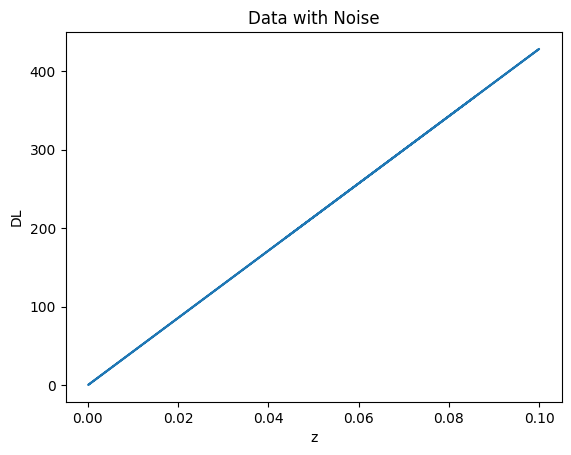

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import astropy.cosmology as cosmo
import astropy.units as unit
import astropy.constants as cons
import h5py
def dl_true_lowz(z, H0):
    return (cons.c.to(unit.km/unit.s).value*z)/H0
N = 10000 #No. of data points
zt = np.random.uniform(0.0001, 0.1, N) #True Redshift points
H0t = 70 #Injected value of True Hubble constant in km/s/Mpc
DLt = dl_true_lowz(zt, H0t) #True distance points in Mpc

DLo = np.random.normal(DLt, 0.01)
DLo = DLo[DLo>0] #Remove negative DL values, it has the potential to create bi
print(np.where(DLo<0), DLo.shape)
_ = plt.errorbar(zt, DLo, yerr=0.01)
plt.xlabel('z')
plt.ylabel('DL')
plt.title('Data with Noise');

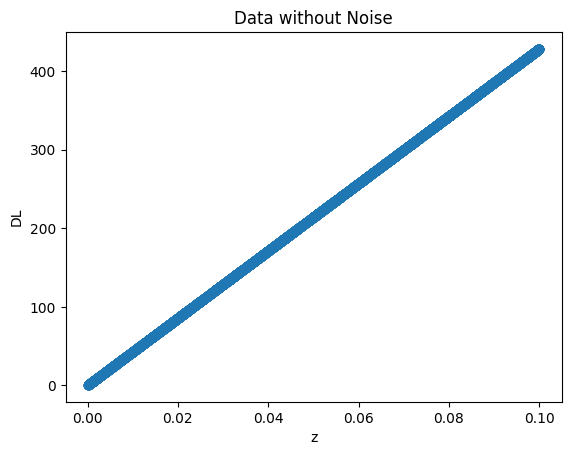

MLE Estimated H0: 70.0123 km/s/Mpc
Error on H0: ±4.14 km/s/Mpc


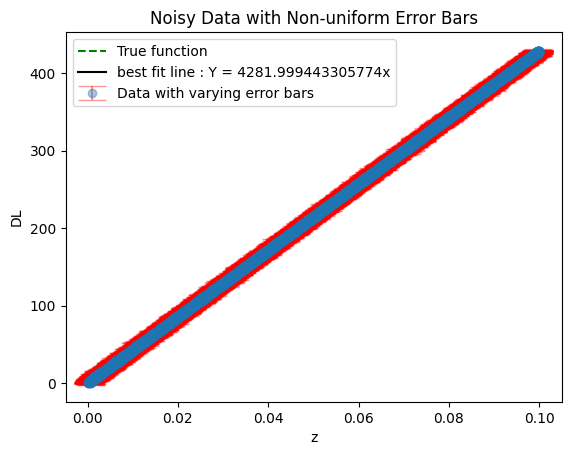

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.cosmology as cosmo
import astropy.units as unit
import astropy.constants as cons
import h5py

def dl_true_lowz(z, H0):
    return (cons.c.to(unit.km/unit.s).value*z)/H0
N = 10000 #No. of data points
zt = np.random.uniform(0.0001, 0.1, N) #True Redshift points
H0t = 70 #Injected value of True Hubble constant in km/s/Mpc
DLt = dl_true_lowz(zt, H0t) #True distance points in Mpc

plt.scatter(zt, DLt)
plt.xlabel('z')
plt.ylabel('DL')
plt.title('Data without Noise')
plt.show()


error = np.random.normal(0, 1.0, N)  # Random error values of normal dist. mean = 0 , sd = 0.01
x = zt  # X-axis values
y = DLt + error  # Noisy Y-axis values
DLo = y
#Plot with error bars
plt.errorbar(x, y, yerr=np.abs(error), fmt='o', label='Data with varying error bars', ecolor='red', capsize=10, alpha = 0.4)
plt.plot(x, DLt, label='True function', linestyle='--', color='green')

plt.xlabel('z')
plt.ylabel('DL')


# ----------- MLE Estimation Using NumPy -----------
# Calculate MLE for H0
a_mle = np.sum((zt-np.mean(zt)) * (DLo - np.mean(DLo))) / np.sum((zt-np.mean(zt))**2)
H0_mle = cons.c.to(unit.km/unit.s).value / a_mle

# Calculate error on H0
sigma_H0 = np.mean( (cons.c.to(unit.km/unit.s).value)*np.sqrt(((zt*error)/(DLo**2))**2) )

print(f"MLE Estimated H0: {H0_mle:.4f} km/s/Mpc")
print(f"Error on H0: ±{sigma_H0:.2f} km/s/Mpc")

plt.plot(zt,(a_mle*zt), label = f"best fit line : Y = {a_mle}x", color = "black", alpha = 1)
plt.title('Noisy Data with Non-uniform Error Bars')
plt.legend()
plt.show()


In [ ]:
#PYMC
import pymc as pm

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.20.1


z = 0.00, D_L = 0.43 Mpc
z = 0.00, D_L = 4.76 Mpc
z = 0.00, D_L = 9.09 Mpc
z = 0.00, D_L = 13.44 Mpc
z = 0.00, D_L = 17.78 Mpc


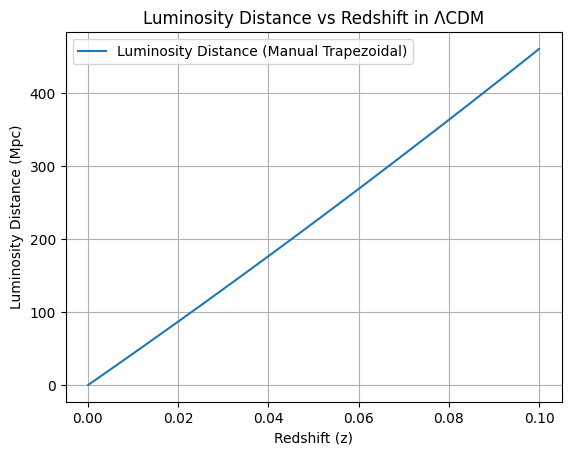

67.47530645875545


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
c = 3e5  # Speed of light in km/s
H_0 = 70  # Hubble constant in km/s/Mpc
Omega_m = 0.3  # Matter density parameter
Omega_Lambda = 0.7  # Dark energy density parameter

# Hubble parameter as a function of redshift
def H_z(z):
    return H_0 * np.sqrt(Omega_m * (1 + z)**3 + Omega_Lambda)

# Trapezoidal integration calculation
def trapezoidal_integral(z_values, f_values):
    integral = 0.0
    for i in range(1, len(z_values)):
        delta_z = z_values[i] - z_values[i - 1]  # Step size
        trapezoid_area = (f_values[i - 1] + f_values[i]) / 2 * delta_z  # Trapezoid area
        integral += trapezoid_area
    return integral

# Luminosity distance calculation
def luminosity_distance(z_values):
    distances = []
    for z in z_values:
        z_integral = np.linspace(0, z, 100)  # Generate points for integration up to z
        E_inv_values = 1 / H_z(z_integral)  # 1 / H(z) values
        integral = trapezoidal_integral(z_integral, E_inv_values)  # Perform integration
        D_L = (1 + z) * c * integral  # Apply (1 + z) factor
        distances.append(D_L)
    return distances

# Define redshift range
redshifts = np.linspace(0.0001, 0.1, 100)  # Redshifts from 0.0001 to  0.1
distances = luminosity_distance(redshifts)

# Print some results
for z, d in zip(redshifts[:5], distances[:5]):  # Display first 5 values
    print(f"z = {z:.2f}, D_L = {d:.2f} Mpc")

# Plot the luminosity distance as a function of redshift
plt.plot(redshifts, distances, label="Luminosity Distance (Manual Trapezoidal)")
plt.xlabel("Redshift (z)")
plt.ylabel("Luminosity Distance (Mpc)")
plt.title("Luminosity Distance vs Redshift in ΛCDM")
plt.legend()
plt.grid()
plt.show()


Ho = []
Ho = (redshifts/distances)*(c)
print(np.mean(Ho))

redshift value => zt  | zt = np.random.uniform(0.0001, 0.1, N)

speed of light -> c

Luminous Distance -> Dlt = (zt*c)/H0

Number of data points -> N

plot -1 : Without Noise

In case of no noise
$$
Dlo = Dlt
$$
With noise
$$
Dlo = Dlt + ϵ
$$

Observed Luminous Distance -> DLo = DLt + N(0,0.01)




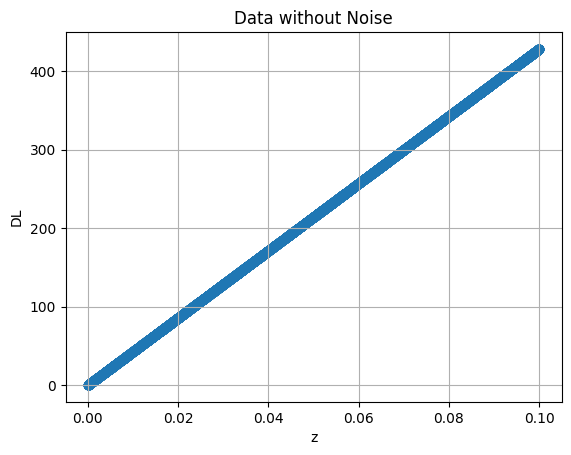

Estimated H0: 69.999972 km/s/Mpc
Error on H0: ±0.000172 km/s/Mpc


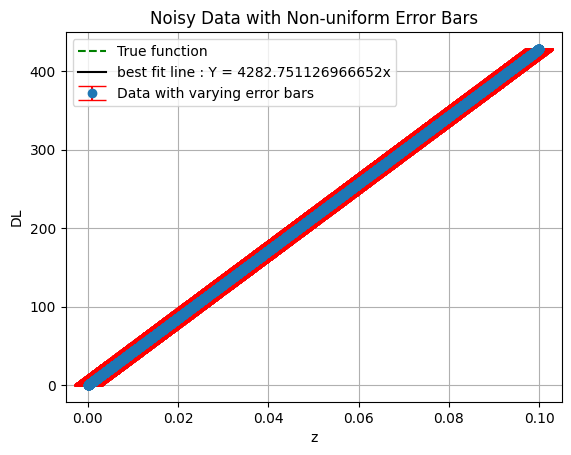

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import astropy.cosmology as cosmo
import astropy.units as unit
import astropy.constants as cons
import h5py

def dl_true_lowz(z, H0):
    return (cons.c.to(unit.km/unit.s).value*z)/H0
N = 10000 #No. of data points
zt = np.random.uniform(0.0001, 0.1, N) #True Redshift points
H0t = 70 #Injected value of True Hubble constant in km/s/Mpc
DLt = dl_true_lowz(zt, H0t) #True distance points in Mpc

plt.scatter(zt, DLt)
plt.xlabel('z')
plt.ylabel('DL')
plt.title('Data without Noise')
plt.grid()
plt.show()


#error = np.random.normal(0, 7.0, N)  # Random error values of normal dist. mean = 0 , sd = 0.01
x = zt  # X-axis values
y = np.random.normal(DLt,0.01)  # Noisy Y-axis values Dlt[i] + error [i] = y
DLo = y
#Plot with error bars
plt.errorbar(x, y, yerr=0.01, fmt='o', label='Data with varying error bars', ecolor='red', capsize=10, alpha = 1)
plt.plot(x, DLt, label='True function', linestyle='--', color='green')

plt.xlabel('z')
plt.ylabel('DL')

# Calculation for H0 || No intercept has been assumed as model = Dl \prop zt
a = np.sum((zt-np.mean(zt)) * (DLo - np.mean(DLo))) / np.sum((zt-np.mean(zt))**2)
H0 = cons.c.to(unit.km/unit.s).value / a

# Calculate error on H0
#sigma_H0 = np.mean( (cons.c.to(unit.km/unit.s).value)*np.sqrt(((zt*error)/(DLo**2))**2) ) # Not great for globally with noise || Also not applicable for wrong use of error
sigma_H01 = np.sqrt(np.mean((DLo - (a*zt))**2))
sigma_H0 = sigma_H01*np.mean(1.0/DLo)

print(f"Estimated H0: {H0:5f} km/s/Mpc")
print(f"Error on H0: ±{sigma_H0:5f} km/s/Mpc")

plt.plot(zt,(a*zt), label = f"best fit line : Y = {a}x", color = "black", alpha = 1)# change from gpt
plt.title('Noisy Data with Non-uniform Error Bars')
plt.grid()
plt.legend()
plt.show()

Output()

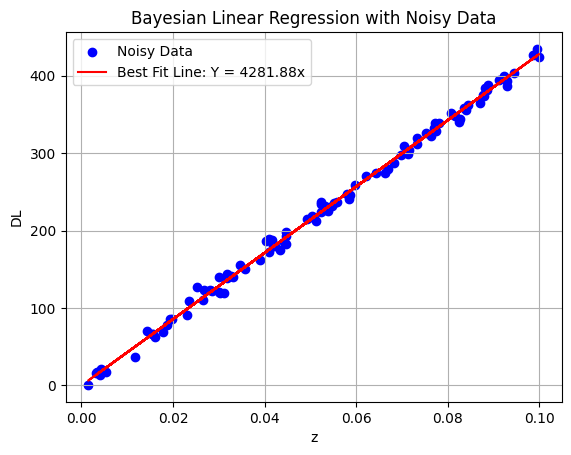

Estimated H0: 70.014772 km/s/Mpc


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.cosmology as cosmo
import astropy.units as unit
import astropy.constants as cons
import pymc as pm

def dl_true_lowz(z, H0):
    return (cons.c.to(unit.km/unit.s).value*z)/H0

N = 100  # Number of data points
zt = np.random.uniform(0.0001, 0.1, N)  # True redshift points
H0t = 70  # Injected value of true Hubble constant in km/s/Mpc
DLt = dl_true_lowz(zt, H0t)  # True distance points in Mpc

# Noisy data generation
error = np.random.normal(0, 7.0, N)  # Random error values || To be changed
x = zt  # X-axis values
y = DLt + error  # Noisy Y-axis values
DLo = y

# Bayesian modeling with PyMC - Enhanced
with pm.Model() as model:
    # Prior for H0 (Modified to avoid potential issues)
    # Using a HalfNormal prior to ensure positive values
    #  and setting a reasonable standard deviation
    H0 = pm.HalfNormal('H0', sigma=10, initval=70)

    # Prior for the slope (a), now informed by H0
    a = pm.Deterministic('a', cons.c.to(unit.km/unit.s).value / H0)

    # Likelihood (model) for the observed data
    likelihood = pm.Normal('y', mu=a * x, sigma=7.0, observed=DLo)

    # Inference: MCMC sampling with tuning and more draws
    trace = pm.sample(2000, tune=1000, target_accept=0.95)

# Extract posterior samples for H0 and a
H0_samples = trace.posterior['H0'].values.flatten()
a_samples = trace.posterior['a'].values.flatten()

# Calculate posterior means for plotting
H0_post = np.mean(H0_samples)
a_post = np.mean(a_samples)

# Plot the result
plt.scatter(x, DLo, label='Noisy Data', color='blue')
plt.plot(x, a_post * x, label=f'Best Fit Line: Y = {a_post:.2f}x', color='red')
plt.xlabel('z')
plt.ylabel('DL')
plt.title('Bayesian Linear Regression with Noisy Data')
plt.legend()
plt.grid()
plt.show()

print(f"Estimated H0: {H0_post:5f} km/s/Mpc")

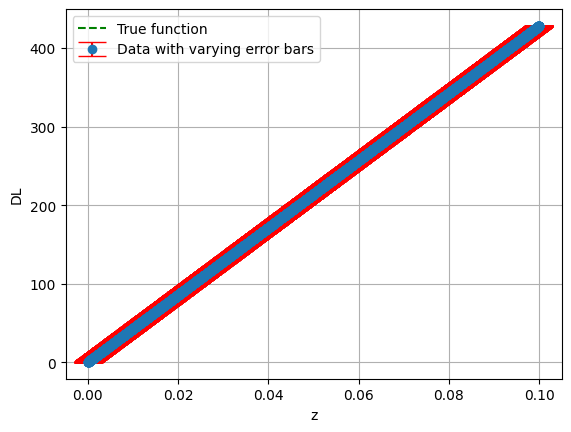

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.cosmology as cosmo
import astropy.units as unit
import astropy.constants as cons
import pymc as pm

def dl_true_lowz(z, H0):
    return (cons.c.to(unit.km/unit.s).value*z)/H0

N = 10000  # Number of data points
zt = np.random.uniform(0.0001, 0.1, N)  # True redshift points
H0t = 70  # Injected value of true Hubble constant in km/s/Mpc
DLt = dl_true_lowz(zt, H0t)  # True distance points in Mpc

# Noisy data generation
noise = 0.01
x = zt  # X-axis values
y = np.random.normal(DLt,noise)  # Noisy Y-axis values Dlt[i] + error [i] = y
DLo = y
#Plot with error bars
plt.errorbar(x, y, yerr=noise, fmt='o', label='Data with varying error bars', ecolor='red', capsize=10, alpha = 1)
plt.plot(x, DLt, label='True function', linestyle='--', color='green')

plt.xlabel('z')
plt.ylabel('DL')
plt.grid()
plt.legend()
plt.show()

In [ ]:
np.where(DLo<0)# Checking if any negative no.s present

(array([], dtype=int64),)

Setting up the Model:

pm.Model() as model:

This line initializes a PyMC model, which is essentially a container for all the elements of our statistical model. Think of it as a workspace where we define our variables, relationships, and data.

Defining the Prior for H0:

H0 = pm.Uniform('H0', lower = 20, upper = 150, initval=70)

Prior: In Bayesian statistics, we start with an initial belief about the parameter we want to estimate (in this case, H0). This initial belief is called the prior distribution.
 *  pm.Uniform: Here, a uniform prior distribution is chosen for H0, meaning we assume that any value between 20 and 150 is equally likely before considering the data.
lower = 20, upper = 150: These set the lower and upper bounds of the uniform distribution.
initval=70: This is an initial guess for H0 that helps the algorithm start its search.

Defining the Slope (a):

a = (cons.c.to(unit.km/unit.s).value / H0)

This line defines the slope (a) of the linear relationship between redshift (x) and luminosity distance (y).
It's calculated based on the speed of light (cons.c) and the Hubble Constant (H0).
Defining the Likelihood:

likelihood = pm.Normal('y', mu=a * x, sigma=noise, observed=DLo)

Likelihood: The likelihood function describes how probable the observed data (DLo) is given a specific value of H0. It essentially connects our model to the data.
 * pm.Normal: This assumes the data follows a normal distribution.
mu=a * x: This is the model – a linear relationship between redshift (x) and luminosity distance (y) with slope a.

 * sigma=noise: This represents the uncertainty or noise in the data.
observed=DLo: This tells PyMC that DLo contains the actual observed data.
Performing Inference (MCMC Sampling):

trace = pm.sample(2000, tune=1000, target_accept=0.95)

Inference: This is the core of Bayesian analysis. PyMC uses a technique called Markov Chain Monte Carlo (MCMC) to estimate the posterior distribution of H0.
Posterior: The posterior distribution combines our prior belief (the uniform distribution) with the information from the data (likelihood) to give us an updated understanding of the likely values of H0.
 * pm.sample(2000, tune=1000, target_accept=0.95): This runs the MCMC sampler.
2000: The number of samples to draw from the posterior distribution.
tune=1000: A warm-up phase to help the sampler find good regions of the posterior.
 * target_accept=0.95: A parameter to ensure the sampler is efficient

In [ ]:
# Bayesian modeling with PyMC - Enhanced
with pm.Model() as model:
    # Prior for H0 (Modified to avoid potential issues)
    # Using a HalfNormal prior to ensure positive values
    #  and setting a reasonable standard deviation
    H0 = pm.Uniform('H0', lower = 20, upper = 150, initval=70) # Uniform dist. as to get better coverage for likelihood

    # Prior for the slope (a), now informed by H0
    a = (cons.c.to(unit.km/unit.s).value / H0)

    # Likelihood (model) for the observed data
    likelihood = pm.Normal('y', mu=a * x, sigma=noise, observed=DLo) # Dlo = np.random.normal() . So data mathches the generation of the init. data

    # Inference: MCMC sampling with tuning and more draws
    trace = pm.sample(2000, tune=1000, target_accept=0.95) # Acceptance rate of samples |

Output()

There are 4 main things in Bayes' theorem :

D=data

$$
P(H_0|D) = \frac{P(H_0)L(D|H_0)}{P(D)}
$$


Prior knowledge of H_0 = P(H0)
Likelihood = L(D|H0) = f(DLo,zo,H0)
$$
\prod_{i = 1}^{N}P(D_{i}|H_{0}) = L(\mu,σ|x)
$$
N = no. of observations = 100



Need to do Hierarchical Difference

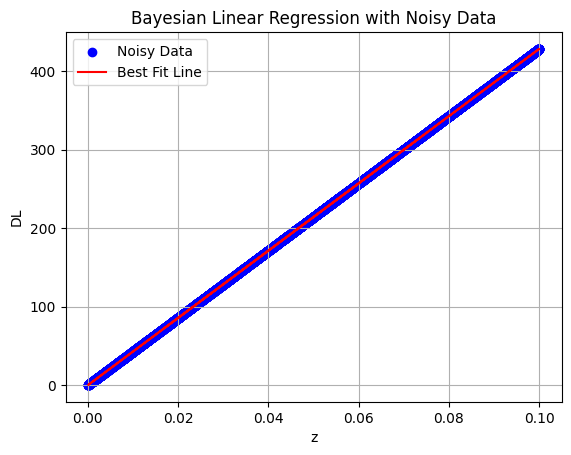

Estimated H0: 69.999979 km/s/Mpc


In [ ]:
# Extract posterior samples for H0 and a
H0_samples = trace.posterior['H0'].values.flatten()
#a_samples = trace.posterior['a'].values.flatten()

# Calculate posterior means for plotting
H0_post = np.mean(H0_samples)
#a_post = np.mean(a_samples)

# Plot the result
plt.scatter(x, DLo, label='Noisy Data', color='blue')
plt.plot(x, ((cons.c.to(unit.km/unit.s).value / H0_post) * x), label=f'Best Fit Line', color='red')
plt.xlabel('z')
plt.ylabel('DL')
plt.title('Bayesian Linear Regression with Noisy Data')
plt.legend()
plt.grid()
plt.show()

print(f"Estimated H0: {H0_post:5f} km/s/Mpc")

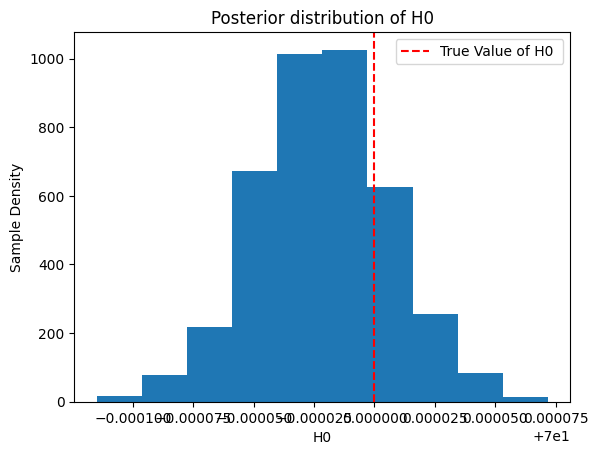

In [ ]:
plt.hist(H0_samples, bins = 10);# x- axis H0 , y-axis samples
plt.axvline(H0t, color = 'r', linestyle='dashed', label= "True Value of H0 ")#true value = 70
plt.title("Posterior distribution of H0")
plt.xlabel("H0")
plt.ylabel("Sample Density")
plt.legend()
#plt.tight_layout()


In [ ]:
np.std(H0_samples) # error bar for H0 || Posterior is covered by the whole sample. Sample covers all the moments.

2.7397043078395674e-05

Output()

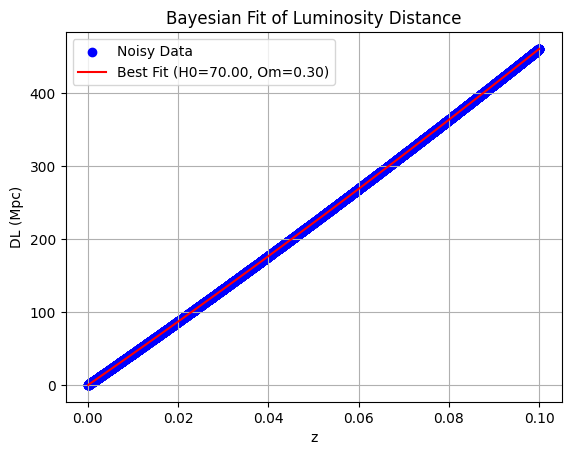

Estimated H0: 70.00 km/s/Mpc
Estimated Om: 0.30


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import astropy.constants as cons
import astropy.units as unit
import scipy.integrate as spi
from scipy.interpolate import interp1d

# Constants
c = cons.c.to(unit.km/unit.s).value  # Speed of light in km/s

# Precompute the integral over a grid of z values
z_grid = np.linspace(0, 0.15, 500)  # 500 precomputed redshift points
Om_fixed = 0.3  # Placeholder for Om, will be varied inside PyMC

integral_grid = np.array([spi.quad(lambda zp: 1.0 / np.sqrt(Om_fixed * (1 + zp)**3 + (1 - Om_fixed)), 0, z)[0] for z in z_grid])

# Define interpolation function
integral_interp = interp1d(z_grid, integral_grid, kind="cubic", fill_value="extrapolate")

# Generate simulated data
N = 10000  # Large dataset
zt = np.sort(np.random.uniform(0.0001, 0.1, N))  # Sorted redshifts
H0t = 70  # True Hubble constant
Omt = 0.3  # True matter density parameter

# Compute true luminosity distances using interpolation
DLt = (c / H0t) * (1 + zt) * integral_interp(zt)


# Use the above part using astropy, but in pymc do interp1d to intercheck.


# Add noise
noise = 0.01
DLo = np.random.normal(DLt, noise)

# Bayesian Model with PyMC
with pm.Model() as model:
    # Priors
    H0 = pm.Uniform('H0', lower=50, upper=100, initval=70)
    Om = pm.Uniform('Om', lower=0.1, upper=0.5, initval=0.3)

    # Use precomputed integral with interpolation
    DL_model = (c / H0) * (1 + zt) * integral_interp(zt)

    # Likelihood function
    y_obs = pm.Normal('y_obs', mu=DL_model, sigma=noise, observed=DLo)

    # Sampling (Fast Now!)
    trace = pm.sample(2000, tune=1000, target_accept=0.95)

# Extract posterior samples
H0_samples = trace.posterior['H0'].values.flatten()
Om_samples = trace.posterior['Om'].values.flatten()
H0_post = np.mean(H0_samples)
Om_post = np.mean(Om_samples)

# Plot results
plt.scatter(zt, DLo, label='Noisy Data', color='blue')
plt.plot(zt, (c / H0_post) * (1 + zt) * integral_interp(zt),
         label=f'Best Fit (H0={H0_post:.2f}, Om={Om_post:.2f})', color='red')

plt.xlabel('z')
plt.ylabel('DL (Mpc)')
plt.title('Bayesian Fit of Luminosity Distance')
plt.legend()
plt.grid()
plt.show()

print(f"Estimated H0: {H0_post:.2f} km/s/Mpc")
print(f"Estimated Om: {Om_post:.2f}")

Write without using scipy. Do using astropy and check

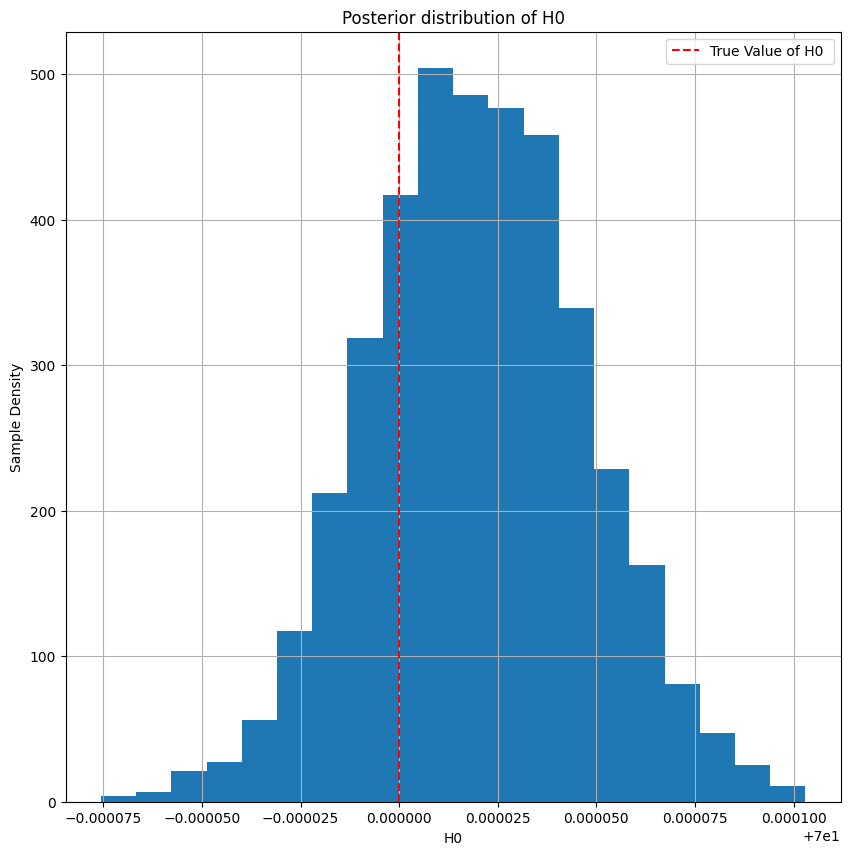

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(H0_samples, bins = 20);# x- axis H0 , y-axis samples

plt.axvline(H0t, color = 'r', linestyle='dashed', label= "True Value of H0 ")#true value = 70
plt.title("Posterior distribution of H0")
plt.xlabel("H0")
plt.ylabel("Sample Density")
plt.grid()
plt.legend()

In [ ]:
np.std(H0_samples) # error bar for H0 || Posterior is covered by the whole sample. Sample covers all the moments.

2.7339202431905816e-05

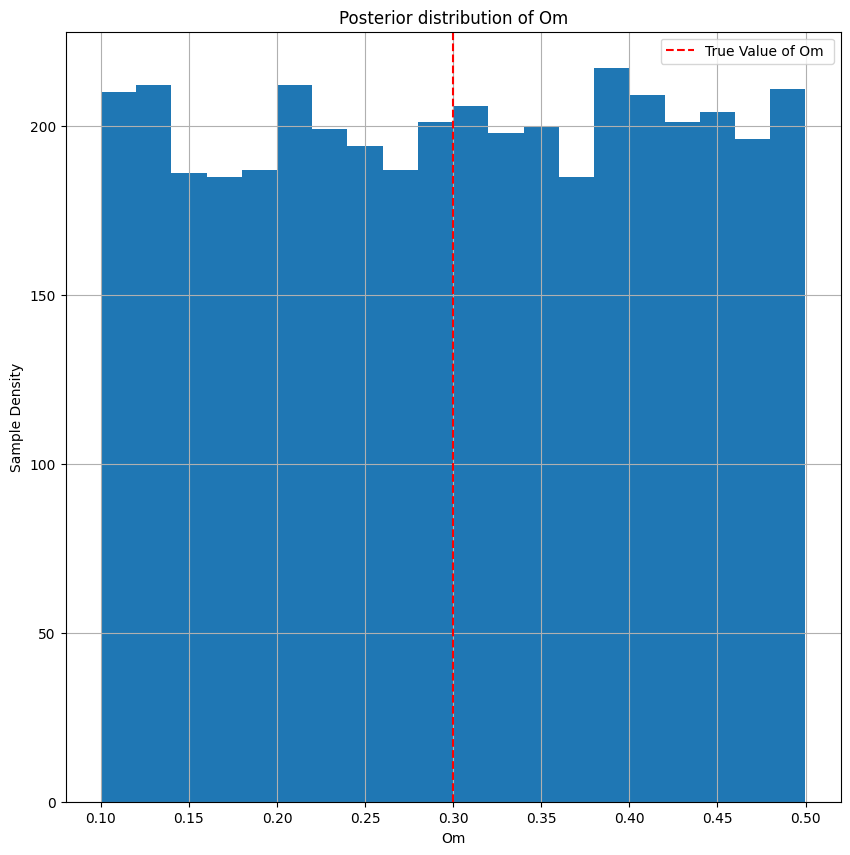

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(Om_samples, bins = 20);# x- axis Om , y-axis samples

plt.axvline(Omt, color = 'r', linestyle='dashed', label= "True Value of Om ")#true value = 0.3
plt.title("Posterior distribution of Om")
plt.xlabel("Om")
plt.ylabel("Sample Density")
plt.grid()
plt.legend()
#It has become prior dist. make post. Infer Om from pymc

In [ ]:
np.std(Om_samples) # error bar for Om || Posterior is covered by the whole sample. Sample covers all the moments.

0.11599286611549968

DO CORNER PLOT (corner.py)             ##LATER arviz



in cosmology space is flat but spacetime is always curved. riemann tensor is non zero. (Check this part !!!)



Infer the Om part. Turn to Pytensor. Use Astropy.(If (1+z) nothere then its co-moving distance.)



Show correlation of z,z2,z3,z4,...z6 by contours.... why?(Tailor series truncate)

Dl/c = f1(z) + f2(z2) + f3(z3) {fi(H0,Om)} [ there is no z0 term]

In [26]:
# Install the required packages
#!pip install pymc pytensor arviz astropy
!pip install corner

Output()

<ipython-input-19-df24fd2c54f9>:44: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed 
in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  integral_interp = interpolate.interp2d(z_grid, Om_grid, integral_grid, kind="cubic") # Changed to interp2d

<ipython-input-19-df24fd2c54f9>:45: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed 
in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  integral_vals = integral_interp(zt, Om)  # Evaluate at Om and zt # Corrected the order of arguments

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
<ipython-input-19-df24fd2c54f9>:77: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  integral_interp = interpolate.interp2d(z_grid, Om_grid, integral_grid, kind="cubic")
<ipython-input-19-df24fd2c54f9>:78: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly 

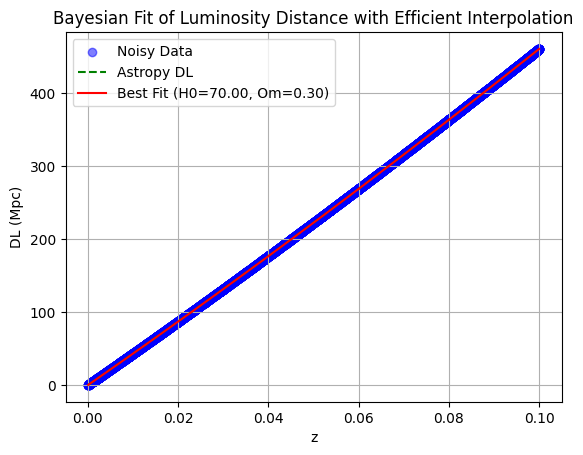

Estimated H0: 70.00 km/s/Mpc
Estimated Om: 0.30


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import astropy.constants as cons
import astropy.units as unit
from astropy.cosmology import FlatLambdaCDM
import scipy.integrate as spi
from pytensor.compile.ops import as_op
import pytensor.tensor as pt
import pytensor
from scipy import interpolate

# Speed of light in km/s
c = cons.c.to(unit.km / unit.s).value

# Define fiducial cosmology
H0_true = 70  # True Hubble constant
Om_true = 0.3  # True matter density parameter
cosmo = FlatLambdaCDM(H0=H0_true, Om0=Om_true)

# Generate redshift grid
z_grid = np.linspace(0, 0.15, 500)
Om_grid = np.linspace(0.1, 0.5, 50)  # Grid for Om values

# Precompute integral grid for different Om values
integral_grid = np.zeros((len(Om_grid), len(z_grid)))

for i, Om in enumerate(Om_grid):
    integral_grid[i, :] = [spi.quad(lambda zp: 1.0 / np.sqrt(Om * (1 + zp)**3 + (1 - Om)), 0, z)[0] for z in z_grid]

# Generate synthetic data
N = 10000
zt = np.sort(np.random.uniform(0.0001, 0.1, N))
DL_true = cosmo.luminosity_distance(zt).to(unit.Mpc).value  # True values from Astropy

# Add noise to simulate observations
noise = 0.01
DLo = np.random.normal(DL_true, noise)

# Define interpolation function using as_op
@as_op(itypes=[pt.dscalar, pt.dvector], otypes=[pt.dvector])
def interp_op(Om, zt):
    # Create integral_interp inside the as_op decorated function
    integral_interp = interpolate.interp2d(z_grid, Om_grid, integral_grid, kind="cubic") # Changed to interp2d
    integral_vals = integral_interp(zt, Om)  # Evaluate at Om and zt # Corrected the order of arguments
    return integral_vals

# Bayesian Inference with PyMC
with pm.Model() as model:
    H0 = pm.Uniform('H0', lower=50, upper=100, initval=70)
    Om = pm.Uniform('Om', lower=0.1, upper=0.5, initval=0.3)

    # Convert zt to a PyTensor shared variable
    zt_shared = pytensor.shared(zt)

    # Use the custom interpolation op
    integral_vals = interp_op(Om, zt_shared)

    DL_model = (c / H0) * (1 + zt_shared) * integral_vals


    y_obs = pm.Normal('y_obs', mu=DL_model, sigma=noise, observed=DLo)

    trace = pm.sample(2000, tune=1000, target_accept=0.95)

# Extract posterior estimates
H0_samples = trace.posterior['H0'].values.flatten()
Om_samples = trace.posterior['Om'].values.flatten()
H0_post = np.mean(H0_samples)
Om_post = np.mean(Om_samples)

# Plot results
plt.scatter(zt, DLo, label='Noisy Data', color='blue', alpha=0.5)
plt.plot(zt, DL_true, label='Astropy DL', color='green', linestyle='dashed')

# Use the interp2d object for plotting the best-fit line
integral_interp = interpolate.interp2d(z_grid, Om_grid, integral_grid, kind="cubic")
plt.plot(zt, (c / H0_post) * (1 + zt) * integral_interp(zt, Om_post),
         label=f'Best Fit (H0={H0_post:.2f}, Om={Om_post:.2f})', color='red')


plt.xlabel('z')
plt.ylabel('DL (Mpc)')
plt.title('Bayesian Fit of Luminosity Distance with Efficient Interpolation')
plt.legend()
plt.grid()
plt.show()

print(f"Estimated H0: {H0_post:.2f} km/s/Mpc")
print(f"Estimated Om: {Om_post:.2f}")

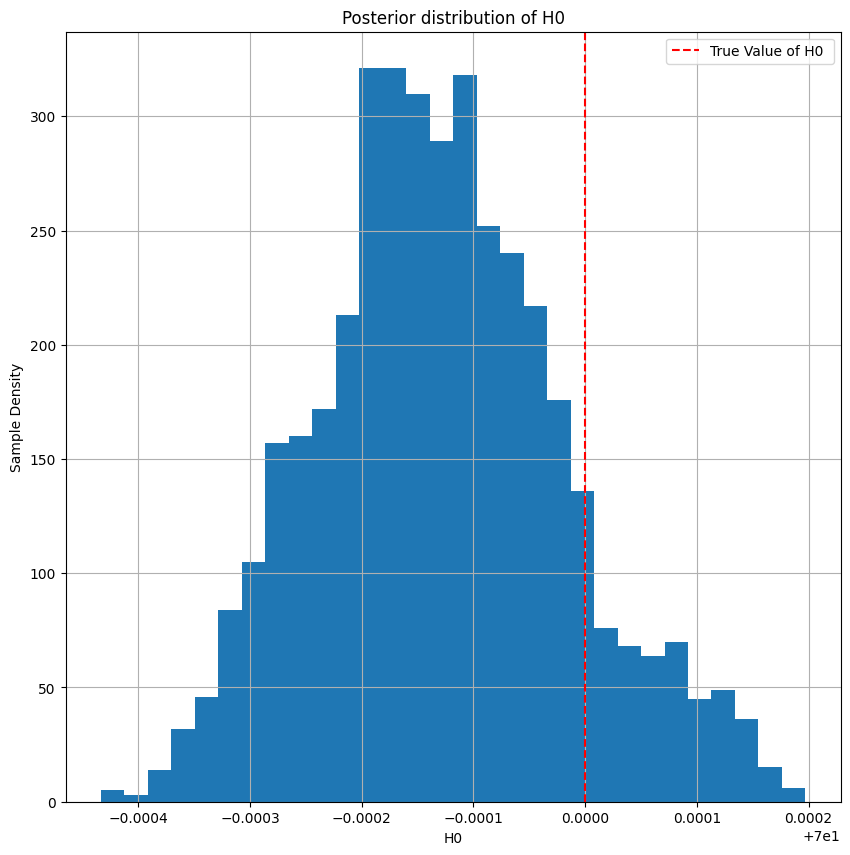

In [34]:
plt.figure(figsize=(10,10))
plt.hist(H0_samples, bins = 30);# x- axis H0 , y-axis samples

plt.axvline(H0t, color = 'r', linestyle='dashed', label= "True Value of H0 ")#true value = 70
plt.title("Posterior distribution of H0")
plt.xlabel("H0")
plt.ylabel("Sample Density")
plt.grid()
plt.legend()

In [22]:
np.std(H0_samples) # error bar for H0 || Posterior is covered by the whole sample. Sample covers all the moments.

0.00011028478267625129

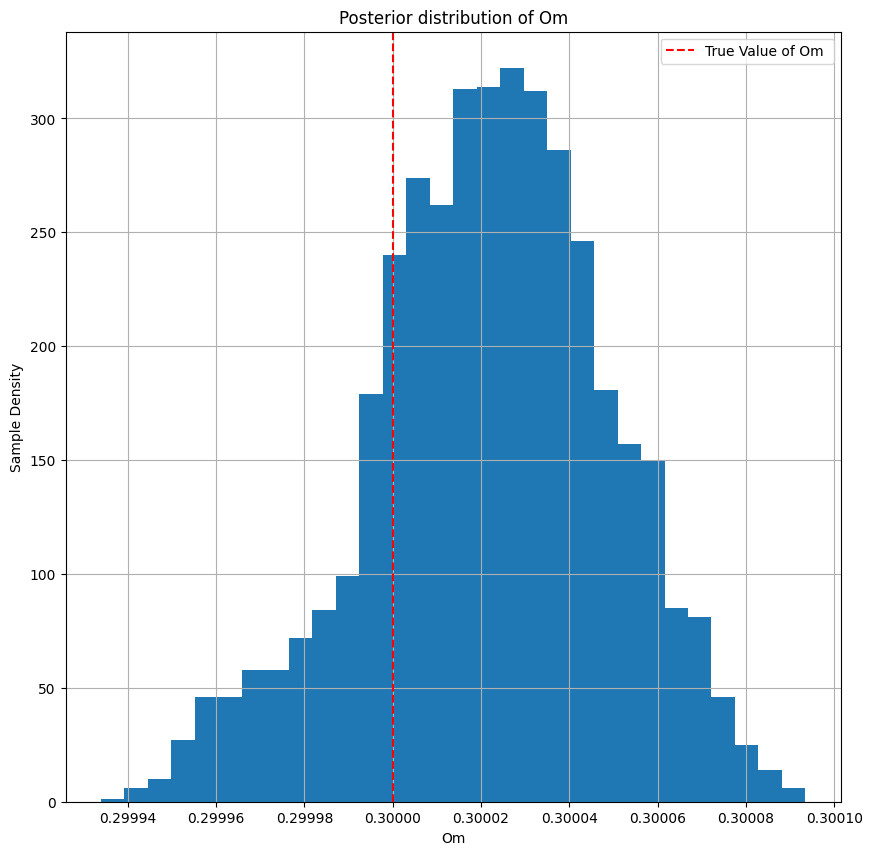

In [35]:
plt.figure(figsize=(10,10))
plt.hist(Om_samples, bins = 30);# x- axis Om , y-axis samples

plt.axvline(Omt, color = 'r', linestyle='dashed', label= "True Value of Om ")#true value = 0.3
plt.title("Posterior distribution of Om")
plt.xlabel("Om")
plt.ylabel("Sample Density")
plt.grid()
plt.legend()

In [23]:
np.std(Om_samples) # error bar for Om || Posterior is covered by the whole sample. Sample covers all the moments.

2.7023035073003053e-05

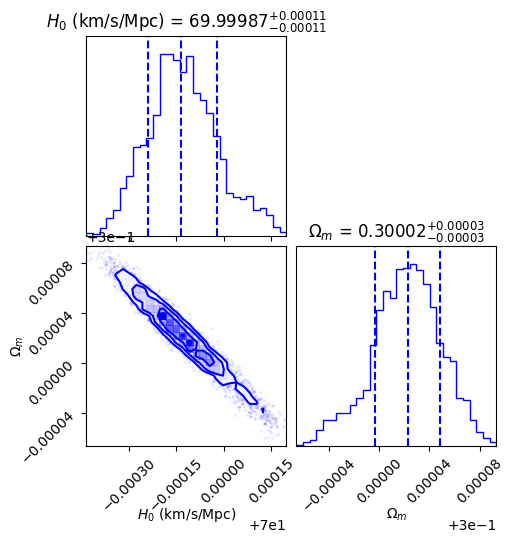

In [28]:
import corner

# Stack the samples into a single array
samples = np.vstack((H0_samples, Om_samples)).T

# Define labels for the parameters
labels = [r"$H_0$ (km/s/Mpc)", r"$\Omega_m$"]

# Create the corner plot
fig = corner.corner(samples, labels=labels, show_titles=True, quantiles=[0.16, 0.5, 0.84],
                     title_fmt=".5f", bins=30, color="blue")

# Show the plot
plt.show()


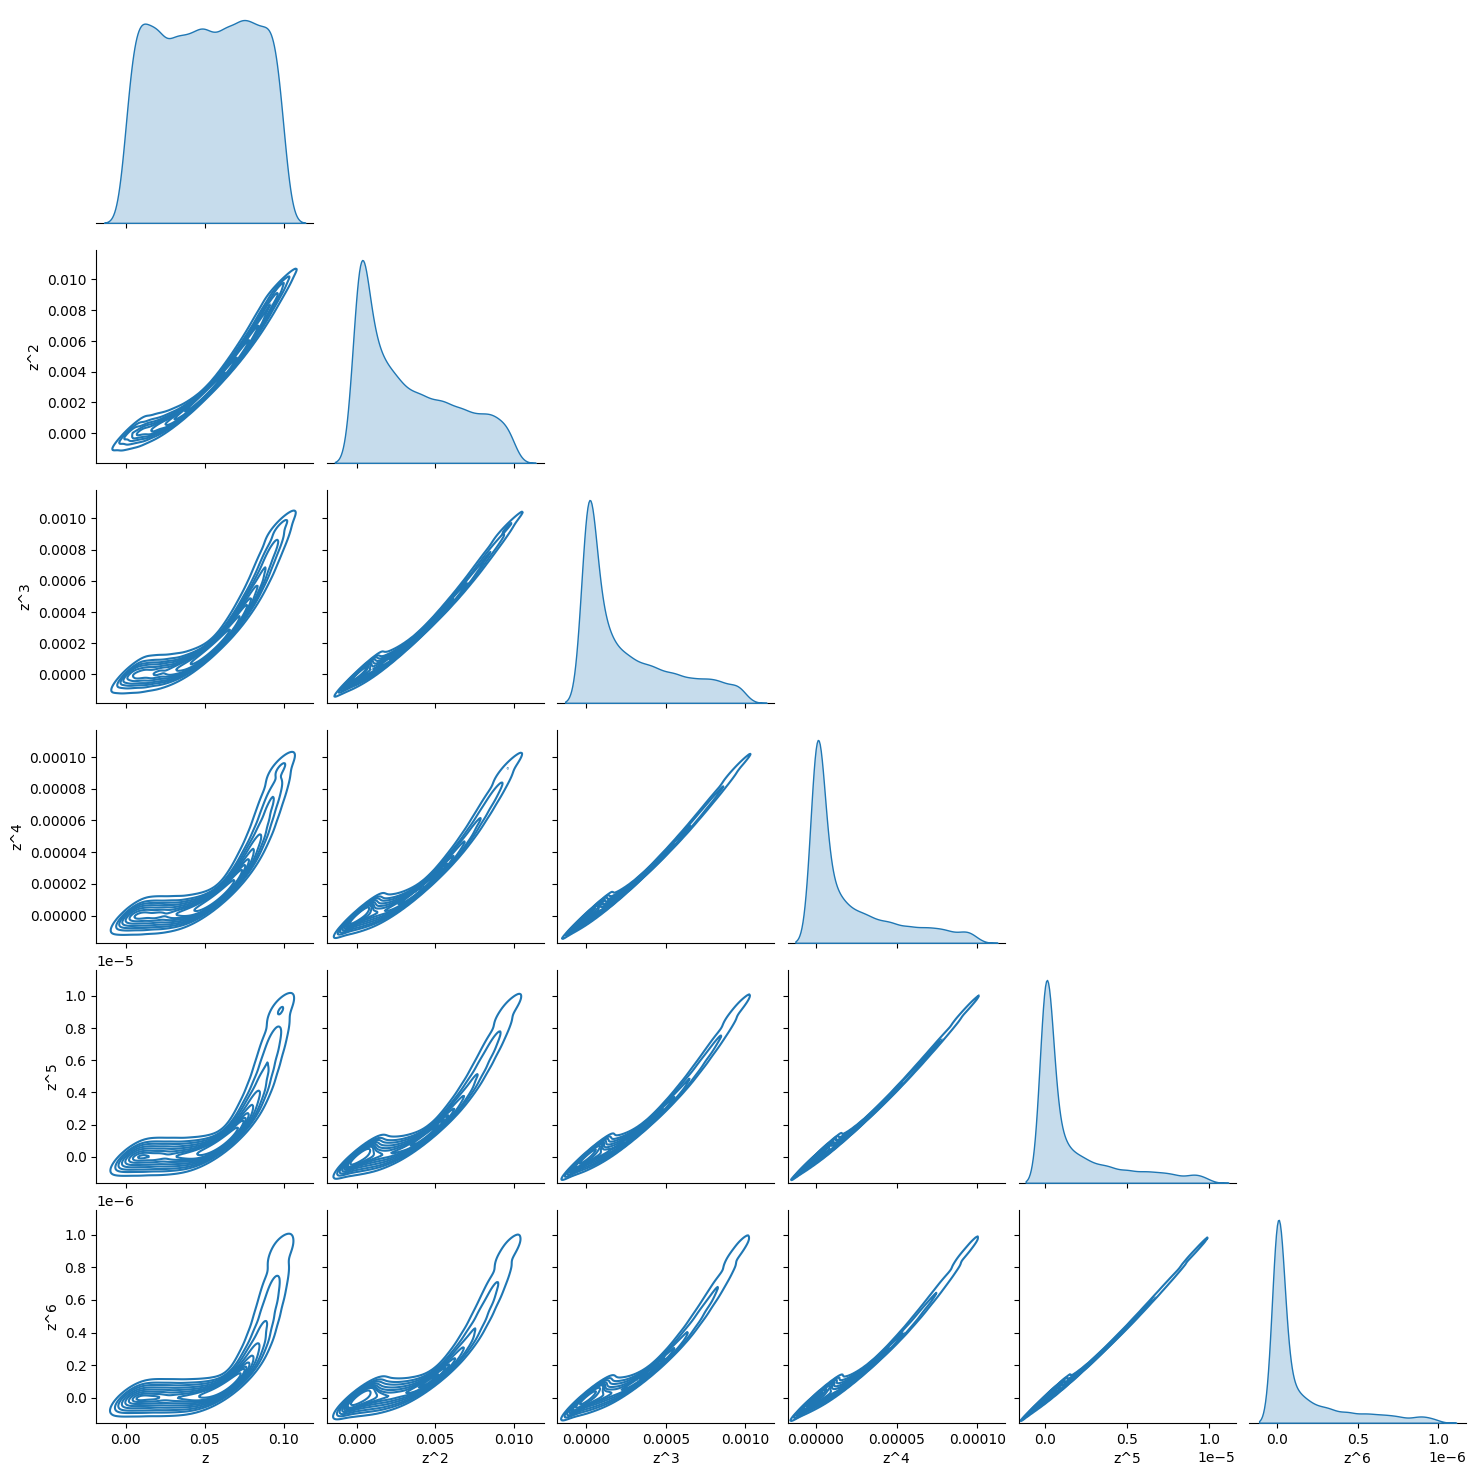

In [33]:
import seaborn as sns

# Compute z powers
z_powers = np.vstack([zt, zt**2, zt**3, zt**4, zt**5, zt**6]).T

# Create a DataFrame for visualization
import pandas as pd
df = pd.DataFrame(z_powers, columns=['z', 'z^2', 'z^3', 'z^4', 'z^5', 'z^6'])

# Create a pair plot with contours
sns.pairplot(df, kind="kde", diag_kind="kde", corner=True)

# Show the plot
plt.show()


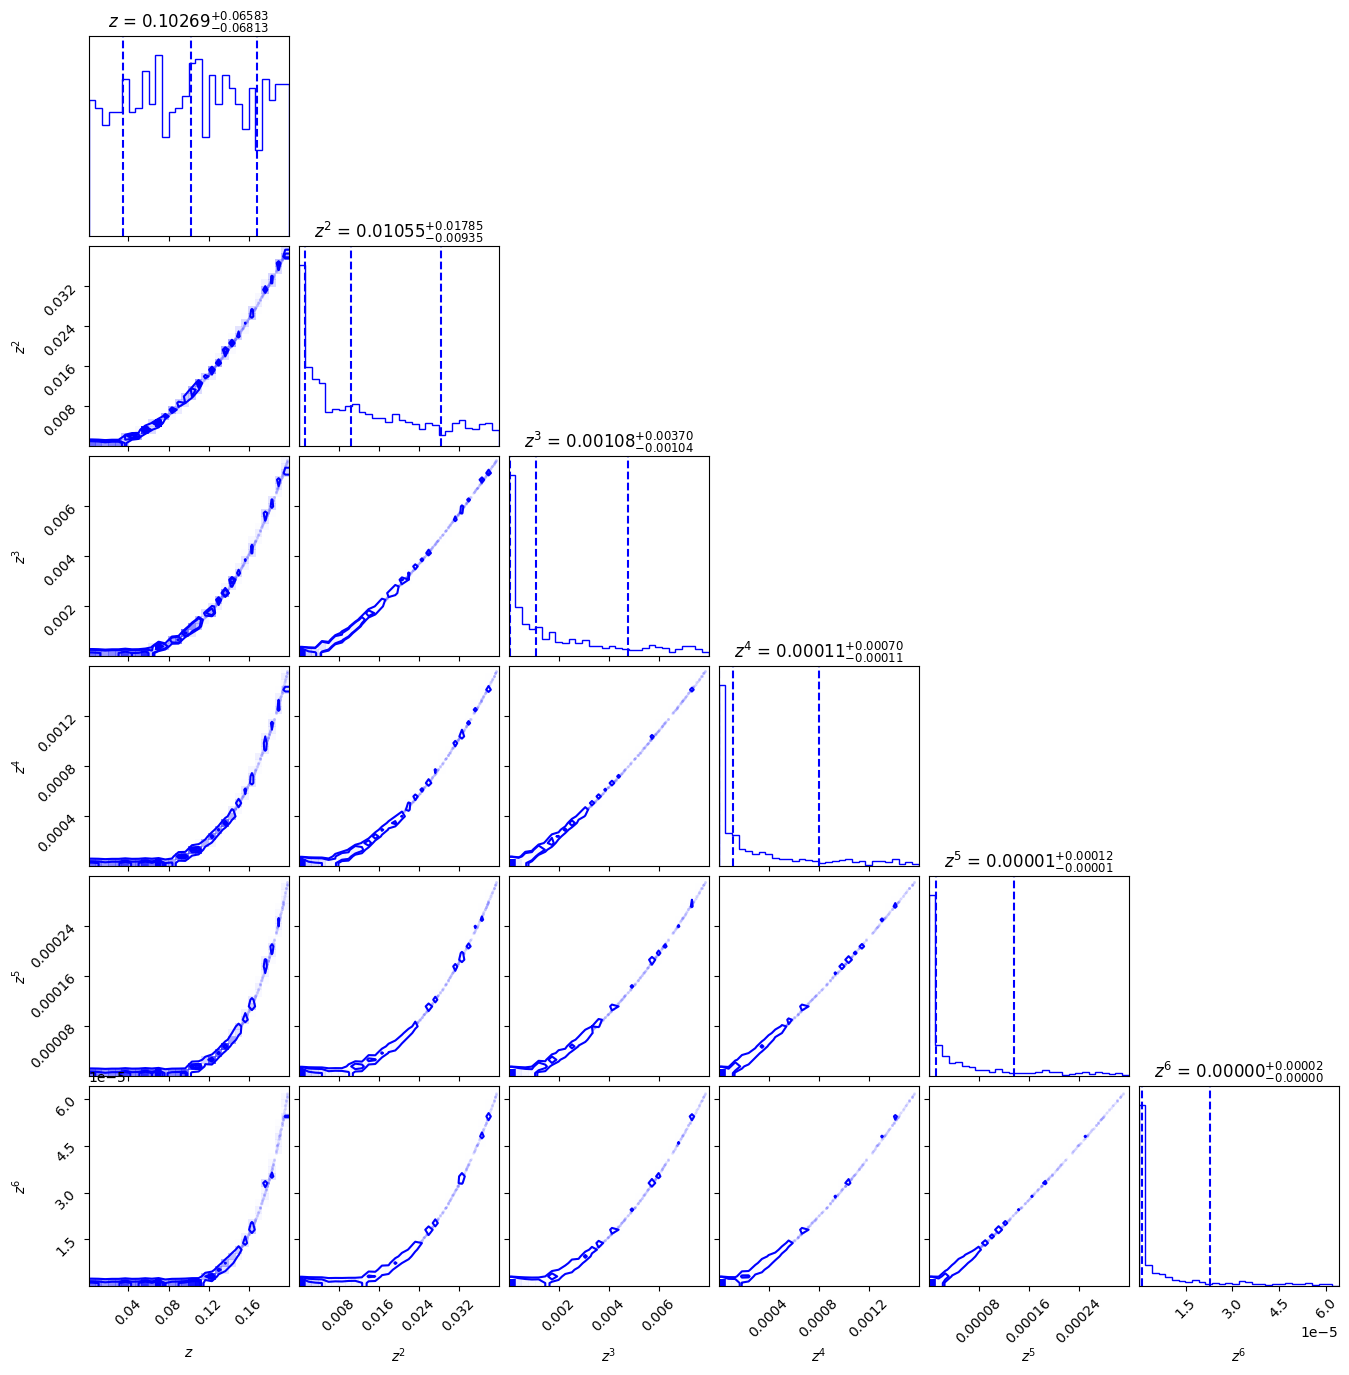

In [47]:


# Use existing zt values
z = zt  # Redshifts

# Compute Taylor series terms (up to z^6)
z_powers = np.vstack([z, z**2, z**3, z**4, z**5, z**6]).T

DL_norm = DLo

# Define labels for the plot
labels = [r"$z$", r"$z^2$", r"$z^3$", r"$z^4$", r"$z^5$", r"$z^6$"]

# Generate corner plot (correlation plot with contours)
fig = corner.corner(z_powers, labels=labels, show_titles=True,
                    quantiles=[0.16, 0.5, 0.84], title_fmt=".5f", bins=30, color="blue")

# Show the plot
plt.show()


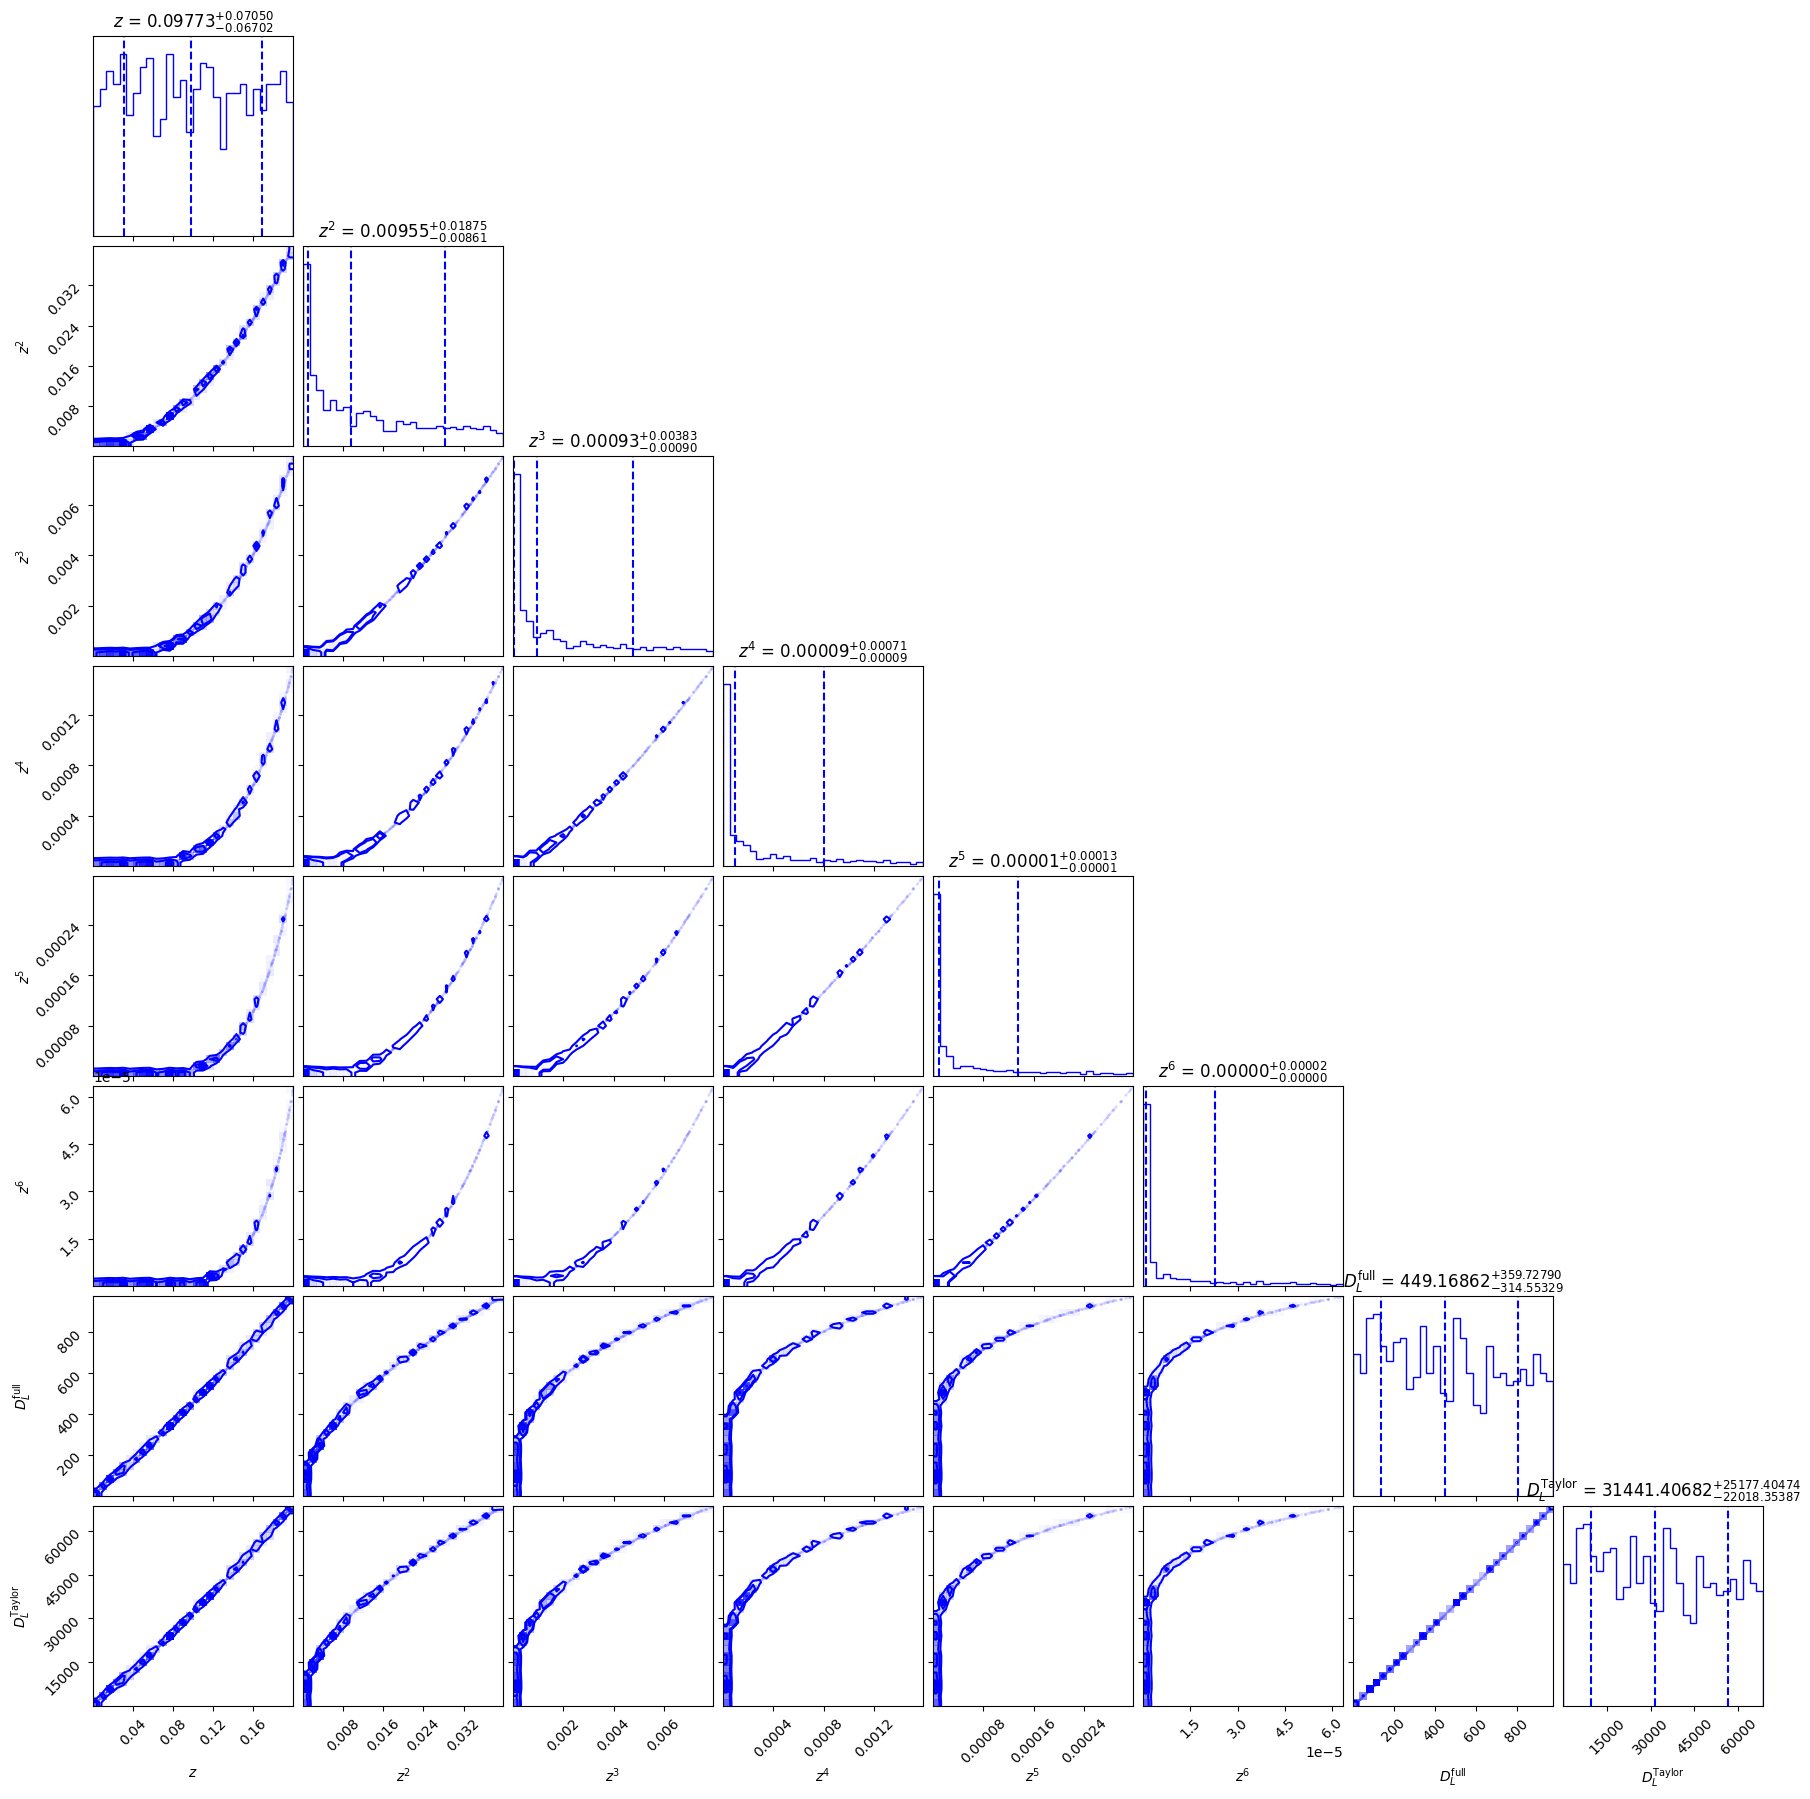

In [48]:
import corner
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
import astropy.constants as cons
import astropy.units as unit
from astropy.cosmology import FlatLambdaCDM

# Constants
c = cons.c.to(unit.km / unit.s).value  # Speed of light in km/s

# Use posterior values from PyMC instead of assumed values
H0_est = H0_post  # Bayesian estimated H0
Om_est = Om_post  # Bayesian estimated Om
cosmo_est = FlatLambdaCDM(H0=H0_est, Om0=Om_est)

# Derived parameters using estimated Om
q0_est = (3/2) * Om_est - 1   # Deceleration parameter
j0_est = 1                     # Jerk parameter in ΛCDM
s0_est = 2 - (9/2) * Om_est   # Snap parameter

# Redshift values (same as previous code)
zt = np.sort(np.random.uniform(0.0001, 0.2, 1000))

# --- Compute Full Luminosity Distance using Integration (with estimated Om) ---
def integrand(zp, Om):
    return 1.0 / np.sqrt(Om * (1 + zp)**3 + (1 - Om))

DL_full = np.array([(c / H0_est) * (1 + z) * quad(integrand, 0, z, args=(Om_est,))[0] for z in zt])

# --- Compute Taylor Series Expansion using estimated parameters ---
DL_taylor = c * (zt
                 + (1 - q0_est) * (zt**2) / 2
                 - (1 - q0_est - 3*q0_est**2 + j0_est) * (zt**3) / 6
                 + (2 - 2*q0_est - 3*q0_est**2 - 3*q0_est**3 + 6*q0_est*j0_est + s0_est) * (zt**4) / 24)

# Compute z powers
z_powers = np.vstack([zt, zt**2, zt**3, zt**4, zt**5, zt**6, DL_full, DL_taylor]).T

# Define labels for the parameters
labels = [r"$z$", r"$z^2$", r"$z^3$", r"$z^4$", r"$z^5$", r"$z^6$", r"$D_L^{\text{full}}$", r"$D_L^{\text{Taylor}}$"]

# Create the corner plot
fig = corner.corner(z_powers, labels=labels, show_titles=True,
                    quantiles=[0.16, 0.5, 0.84], title_fmt=".5f", bins=30, color="blue")

# Show the plot
plt.show()
